# Imports

In [125]:
import pandas as pd
import numpy as np
import math

# models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# processing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# config
def make_report(y_pred , y_true):
    print ("")
    print ("Classification Report: ")
    print (classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()
    
pd.set_option('display.max_columns', 50)
path = 'datasets/kaggle/mobile-price-classification/'

# Load Data

In [80]:
data = pd.read_csv(path+'train.csv')
print(data.shape)
display(data.head())
display(data.info())
display(data.describe())

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

None

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Preprocessing

In [3]:
null_count = data.isnull().sum().sort_values(ascending = False)
null_count = null_count[null_count>0]
null_count

Series([], dtype: int64)

# Outliers

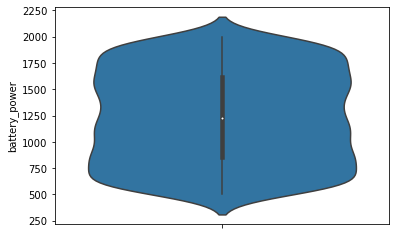

battery_power


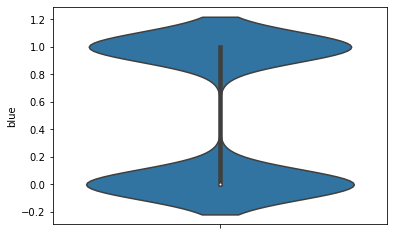

blue


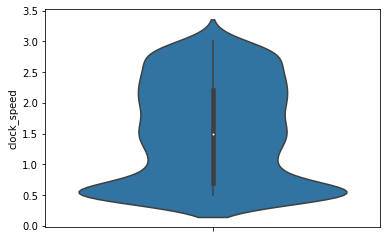

clock_speed


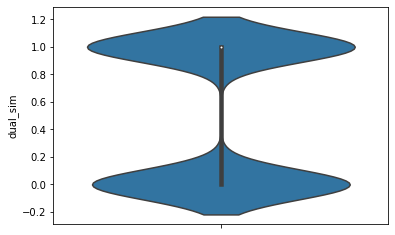

dual_sim


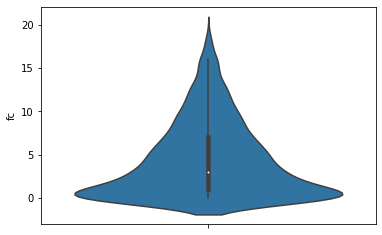

fc


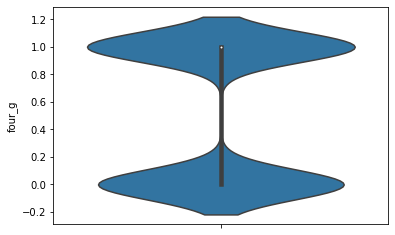

four_g


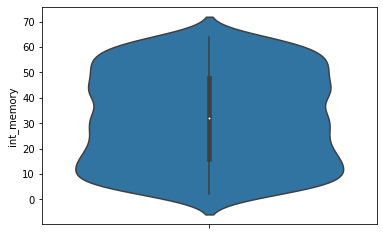

int_memory


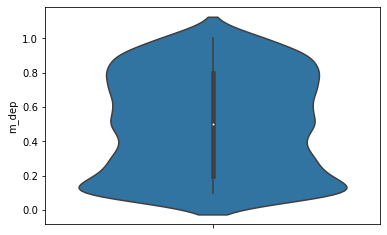

m_dep


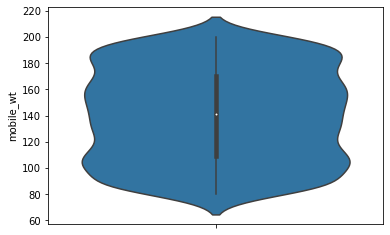

mobile_wt


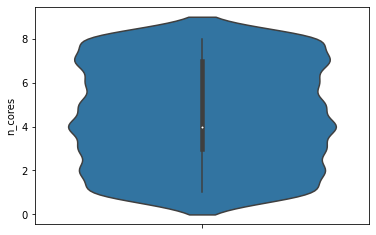

n_cores


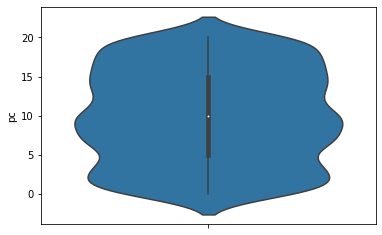

pc


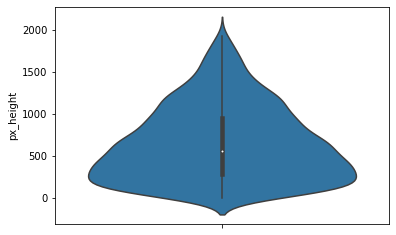

px_height


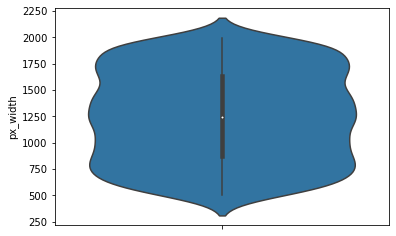

px_width


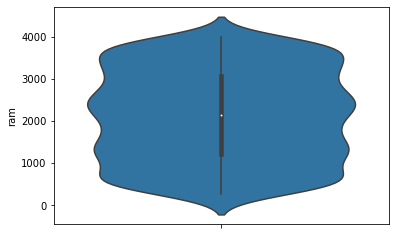

ram


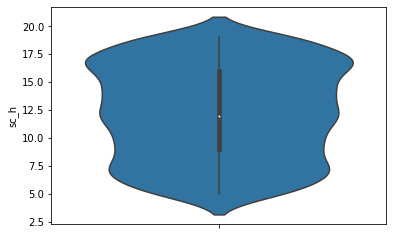

sc_h


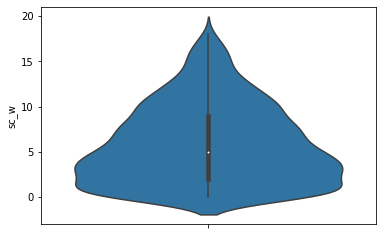

sc_w


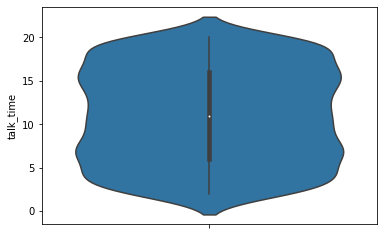

talk_time


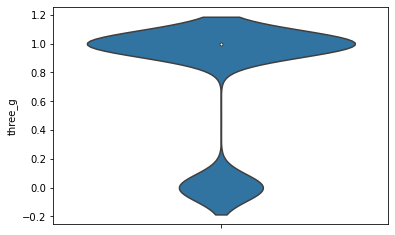

three_g


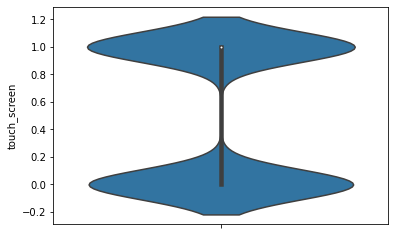

touch_screen


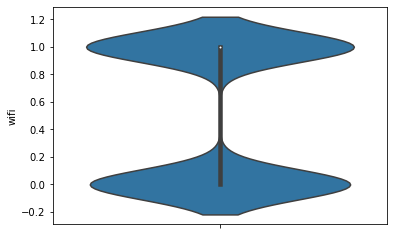

wifi


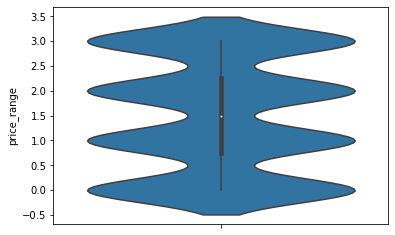

price_range


In [4]:
for i in data.columns:
    try:
        sns.violinplot(y = data[i])
        plt.show()
        print(i)
    except:
        pass

# Modeling

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price_range', axis=1), data['price_range'], test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1400, 20)
(1400,)
(600, 20)
(600,)


# q2


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



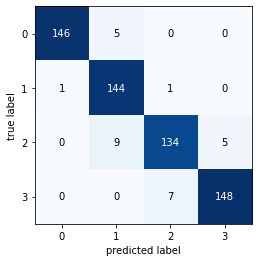

In [7]:
clf = SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
make_report(pred, y_test)

# q3


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.94      0.99      0.97       146
           2       0.99      0.94      0.97       148
           3       0.97      0.99      0.98       155

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



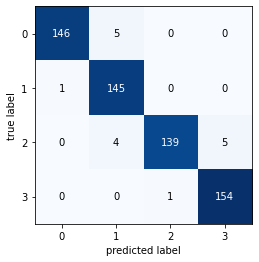





Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.92      0.97      0.94       146
           2       0.95      0.90      0.92       148
           3       0.97      0.96      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



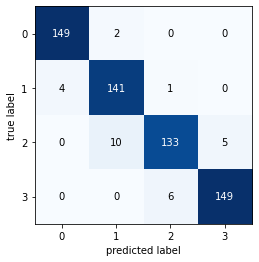





Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



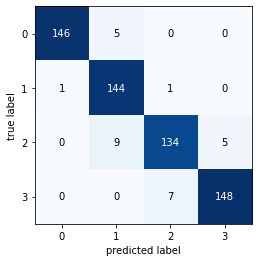





Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



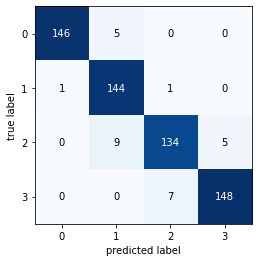





Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



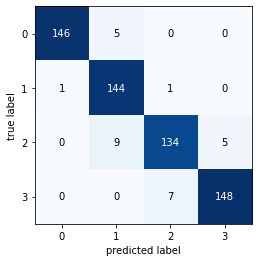

In [13]:
models = [
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(shrinking = False),
    SVC(decision_function_shape='ovr'),
    SVC(decision_function_shape='ovo'),
]
for clf in models:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    make_report(pred, y_test)
    print('\n\n')

# q4


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.94      0.99      0.97       146
           2       0.99      0.94      0.97       148
           3       0.97      0.99      0.98       155

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



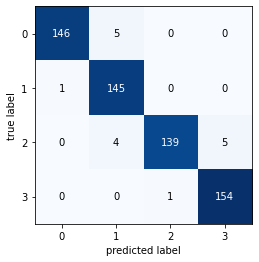





Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       151
           1       0.95      1.00      0.98       146
           2       0.99      0.95      0.97       148
           3       0.97      0.99      0.98       155

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



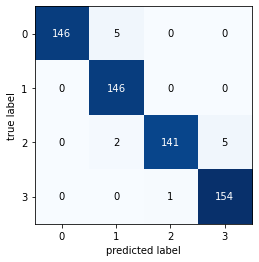

In [14]:
models = [
    SVC(kernel='linear', C=1),
    SVC(kernel='linear', C=0.05),
]
for clf in models:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    make_report(pred, y_test)
    print('\n\n')

# q5

<AxesSubplot:>

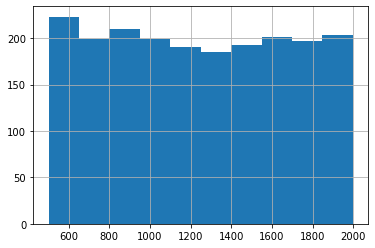

In [20]:
data.battery_power.hist()

## bin

In [25]:
data['bp_bin_4'] = data.battery_power.apply(lambda x: int(x%4))
data['bp_bin_6'] = data.battery_power.apply(lambda x: int(x%6))
data['bp_bin_unbalance'] = data.battery_power.apply(lambda x: int(x<1000))

In [31]:
for i in data.columns:
    print(i,'\t',len(data[i].unique()))

battery_power 	 1094
blue 	 2
clock_speed 	 26
dual_sim 	 2
fc 	 20
four_g 	 2
int_memory 	 63
m_dep 	 10
mobile_wt 	 121
n_cores 	 8
pc 	 21
px_height 	 1137
px_width 	 1109
ram 	 1562
sc_h 	 15
sc_w 	 19
talk_time 	 19
three_g 	 2
touch_screen 	 2
wifi 	 2
price_range 	 4
bp_bin_4 	 4
bp_bin_6 	 6
bp_bin_unbalance 	 2


### dataset dont have any categorical feature so onehot is no go

## transforms

In [81]:
for feat in ["fc", "px_height","sc_w","clock_speed"]:
    data[feat+'_log'] = np.log(data[feat]+1)

## area 

In [84]:
data['mobile_area'] = data['sc_w'] * data['sc_h']

# q6

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price_range', axis=1), data['price_range'], test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
feats = X_train.columns

(1400, 25)
(1400,)
(600, 25)
(600,)



Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.95      0.90      0.92       148
           3       0.96      0.96      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



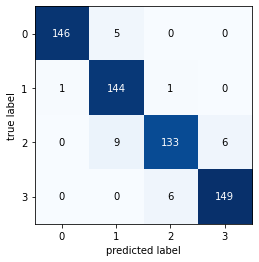

In [92]:
clf = SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
make_report(pred, y_test)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'fc_log', 'px_height_log', 'sc_w_log',
       'clock_speed_log'],
      dtype='object')

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.94      0.91      0.92       148
           3       0.97      0.95      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



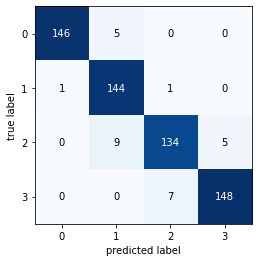

In [100]:
print(feats[:24])
clf = SVC()
clf.fit(X_train[feats[:24]], y_train)
pred = clf.predict(X_test[feats[:24]])
make_report(pred, y_test)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'mobile_area']

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.99      0.95       146
           2       0.95      0.90      0.92       148
           3       0.96      0.96      0.96       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



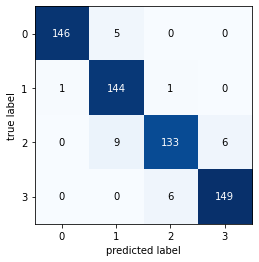

In [124]:
feats = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'mobile_area']
print(feats)
clf = SVC()
clf.fit(X_train[feats], y_train)
pred = clf.predict(X_test[feats])
make_report(pred, y_test)

# q8

In [127]:
data = pd.read_csv(path+'train.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('price_range', axis=1), data['price_range'], test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1400, 20)
(1400,)
(600, 20)
(600,)



Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       151
           1       0.73      0.75      0.74       146
           2       0.73      0.71      0.72       148
           3       0.86      0.86      0.86       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



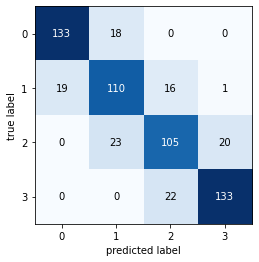

In [128]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
make_report(pred, y_test)

In [142]:
for max_depth in [8,20,40,100]:
    for min_samples_leaf in [1,5,20,40]:
        clf = DecisionTreeClassifier(max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('max_depth: {} \t min_sample_leaf: {} \t score: {}'.format(max_depth, min_samples_leaf, score))
        
    

max_depth: 8 	 min_sample_leaf: 1 	 score: 0.8133333333333334
max_depth: 8 	 min_sample_leaf: 5 	 score: 0.8283333333333334
max_depth: 8 	 min_sample_leaf: 20 	 score: 0.81
max_depth: 8 	 min_sample_leaf: 40 	 score: 0.76
max_depth: 20 	 min_sample_leaf: 1 	 score: 0.8183333333333334
max_depth: 20 	 min_sample_leaf: 5 	 score: 0.8166666666666667
max_depth: 20 	 min_sample_leaf: 20 	 score: 0.81
max_depth: 20 	 min_sample_leaf: 40 	 score: 0.76
max_depth: 40 	 min_sample_leaf: 1 	 score: 0.8066666666666666
max_depth: 40 	 min_sample_leaf: 5 	 score: 0.8233333333333334
max_depth: 40 	 min_sample_leaf: 20 	 score: 0.81
max_depth: 40 	 min_sample_leaf: 40 	 score: 0.76
max_depth: 100 	 min_sample_leaf: 1 	 score: 0.8133333333333334
max_depth: 100 	 min_sample_leaf: 5 	 score: 0.8266666666666667
max_depth: 100 	 min_sample_leaf: 20 	 score: 0.8016666666666666
max_depth: 100 	 min_sample_leaf: 40 	 score: 0.76


# q11

In [145]:
Xt, Xval, yt, yval = train_test_split(X_train, y_train, random_state = 0)

In [154]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(Xt, yt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

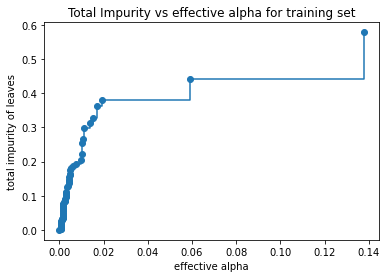

In [155]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [156]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xt, yt)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17155708378205958


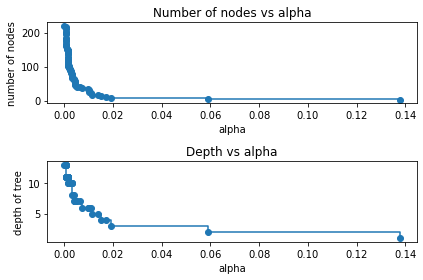

In [157]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

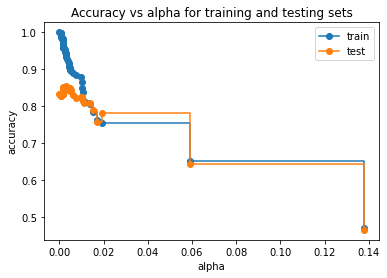

In [158]:
train_scores = [clf.score(Xt, yt) for clf in clfs]
test_scores = [clf.score(Xval, yval) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       151
           1       0.73      0.78      0.75       146
           2       0.73      0.73      0.73       148
           3       0.88      0.88      0.88       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



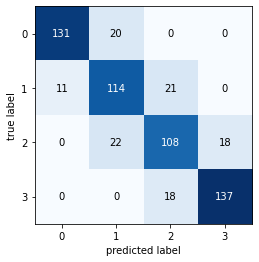

In [164]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
make_report(pred, y_test)

# q12


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       151
           1       0.82      0.87      0.84       146
           2       0.82      0.77      0.79       148
           3       0.92      0.90      0.91       155

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.88      0.87       600



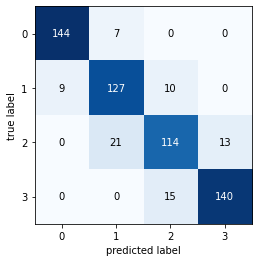

In [165]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
make_report(pred, y_test)